## Fraud Detection

In the last decade, technology has made our life much more easier than before, by communicating with people anywhere in the world, E-learning, Sharing experiences and opinions, selling and making money, and so forth.

Concerning E-commerce, it has allowed most of customers to purchase whatever they need and whenever they want without wasting time. So compagnies need to control all transactions to detect whether is legal transaction or not.

In this project, we will implement a Machine Learning algorithm, to detect whether a transaction is fraudulent or not, the model will be evaluated based on some metrics like test score and Precision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.simplefilter("ignore")

- We start by importing our dataset.
                  -
- Most of features were anonymized, but don't panic, our dataset is still good to extract Knowledge.

In [2]:
data = pd.read_csv("C:/Users/abdel/Documents/Projects/credits_cards_fraud_detection/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
display(data.shape)

(284807, 31)

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Class,0,0.0
V14,0,0.0
V1,0,0.0
V2,0,0.0
V3,0,0.0
V4,0,0.0
V5,0,0.0
V6,0,0.0
V7,0,0.0
V8,0,0.0


Our dataset doesn't contain any missing values, that's great.

Let's take a look at the distribution of the target variable

Text(0, 0.5, 'Number of Churn')

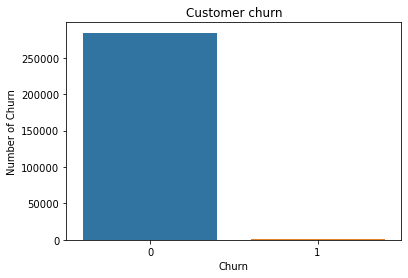

In [6]:
y = data["Class"].value_counts()
#print (y)
sns.barplot(y.index, y.values)
plt.title('Customer churn')
# Set x-axis label
plt.xlabel('Churn')
# Set y-axis label
plt.ylabel('Number of Churn')

In [7]:
print("% OF Fraud and non Fraud")
print(round(data['Class'].value_counts(normalize=True) * 100,2))

% OF Fraud and non Fraud
0    99.83
1     0.17
Name: Class, dtype: float64


- We have 99.83% of negative Class, which means (Not Fraud), and 0.17% of positif class (considered as Fraud). This will create a problem when developing our predictive model.

****************

- In this kind of situation, you will get a very good accuracy for negative Class (approximatly near to 100%), but the model won't be able to predict positif classes so before starting modelisation, we are goind to apply a method called SMOTE(), it allows to create copies from positive classes to balanced our data.

##### We visualize now the distrbution of some variables

In [ ]:
sns.pairplot(data,vars = ['V1','V2','V3','V4','V5', 'Amount'], hue="Class")

## We Prepare our dataset

In [8]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [9]:
display(X.shape)
display(y.shape)

(284807, 30)

(284807,)

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2222)

In [11]:
display(X_train.shape)
display(y_train.shape)

(199364, 30)

(199364,)

### Features Selection using Random Forest

Here, we try to search some important features or selecting features. In scikit-learn, we can perform this task in the following steps:

- First, we need to create a Random Forest model.
- Second, we use the feature importance variable to see feature importance scores.
- Third, we visualize these scores using the seaborn library

In [12]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
preds = RF.predict(X_test)

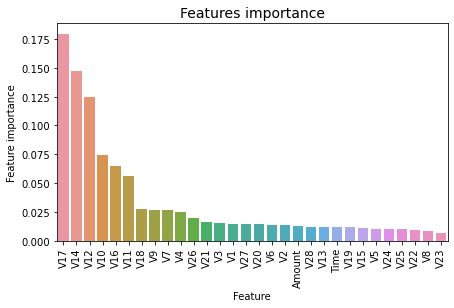

In [15]:
features = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': RF.feature_importances_})
features = features.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=features)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [16]:
display(features)

,Feature,Feature importance
17,V17,0.179773
14,V14,0.147232
12,V12,0.124733
10,V10,0.074437
16,V16,0.064862
11,V11,0.055943
18,V18,0.027389
9,V9,0.027020
7,V7,0.026688
4,V4,0.024877


We can choose to eliminate four features: V23, V8, V22 and V25, these features have a score less than 0.010, our new dataset will contain just 27 features to make predictions. 
It's also possible to keep all variables, maybe it could improve or not slightly our model.

In [21]:
selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V24', 'V26', 'V27', 'V28', 'Amount', 'Class']  

In [22]:
data_selected= data[selected_features]

In [23]:
display(data_selected.shape)

(284807, 27)

In [24]:
data_selected.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V24', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Create our data with selected features

In [25]:
X = data_selected.iloc[:,:-1]
y = data.iloc[:, -1]

We must split again our dataset, since we modified the number of features

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2222)

### Features scaling

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train.iloc[:, :-1] =sc.fit_transform(X_train.iloc[:, :-1])
X_test.iloc[:, :-1] =sc.fit_transform(X_test.iloc[:, :-1])

#### Dealing with imbalanced Data

In [28]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1111)
X_balanced, y_balanced = sm.fit_resample(X_train, y_train)

In [29]:
print('After OverSampling, the shape of train_X: {}'.format(X_balanced.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced==0)))

After OverSampling, the shape of train_X: (398044, 26)
After OverSampling, the shape of train_y: (398044,) 

After OverSampling, counts of label '1': 199022
After OverSampling, counts of label '0': 199022


## Modeling

In this section, we will implement Machine Learning models for classification (Supervised Learning), we will use four common algorithms:
- Logistic regression
- K Nearest Neighbors (KNN)
- Guassian Naive Bayes 
- Linear Discriminant analysis

## Performance Evaluation

After applying machine learning algorithms, we need some tools to find out how well they performed their jobs.
These tools are called performance evaluation metrics. A significant number of metrics have been introduced in this project, where each one considers certain aspects of an algorithm performance. Thus, for each machine learning
problem we require an appropriate set of metrics for performance evaluation. we have calculated several common metrics for classification problems to obtain valuable information about the performance of algorithms and to run a comparative analysis. These metrics are precision, recall, f1-score, accuracy and confusion matrix.

### Precision:
It simply shows “what number of selected data items are relevant”. In other words, out of the observations that an algorithm has predicted to be positive, how many of them are actually positive.
According to formula (1), the precision equals the number of true positives divided by the sum of true positives and false positives:
 \begin{equation}
       (1) Precision =  TP / ( TP+FP )
 \end{equation}

### Recall

It presents “what number of relevant data items are selected”. In fact, out of the observations that are actually positive, how many of them have been predicted by the algorithm. According to formula (2), the recall equals the number of true
positives divided by the sum of true positives and false negatives:

\begin{equation}
       (2) Recall =  TP / ( TP+FN )
 \end{equation}


### F1-score:
This metric, which is also known as f-score or f-measure, takes both precision and recall into consideration in order to calculate the performance of an algorithm. Mathematically, it is the harmonic mean of precision and recall formulated as follows:

\begin{equation}
       (3) F1 - Score =  2 * (Precision * Recall) / (Precision + Recall)
 \end{equation}



### Accuracy:
It is the most used and maybe the first choice for evaluating an algorithm performance in classification problems. It can be defined as the ratio of accurately classified data items to the total number of observations (formula (4)). Despite the widespread usability, accuracy is not the most appropriate performance metric in some situations, especially in the cases where target variable classes in the dataset are unbalanced:

\begin{equation}
       (4) Accuracy = (TP + TN) / (TP + TN + FP + FN)
 \end{equation}


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logit_model = LogisticRegression()
LR_model = logit_model.fit(X_balanced,y_balanced)

In [32]:
LR_model.score(X_balanced,y_balanced)

0.9672950729065128

In [33]:
LR_model.score(X_test,y_test)

0.9833105111009679

In [34]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf1 = confusion_matrix(y_test, LR_model.predict(X_test))

<AxesSubplot:>

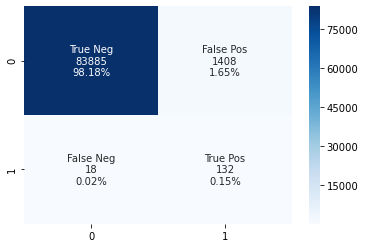

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf1.flatten()/np.sum(conf1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf1, annot=labels, fmt='', cmap='Blues')

### Metrics for Logistic Regression

In [36]:
print('Precision: {:.2f}'.format(132/(132+1408)*100),('%'))
print('Recall: {:.2f}'.format(132/(132+18)*100),('%'))
print('Accuracy: {:.2f}'.format((132+83885)/(132+83885+1408+18)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((132/(132+1408))*(132/(132+18))/(132/(132+1408)+132/(132+18)))*100),('%'))

Precision: 8.57 %
Recall: 88.00 %
Accuracy: 98.33 %
F1- Score: 15.62 %


# Gaussian Naive Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB_model = NB.fit(X_balanced, y_balanced)
NB_model.score(X_balanced, y_balanced)

0.9171096662680508

In [38]:
NB_model.score(X_test, y_test)

0.9769202860386457

<AxesSubplot:>

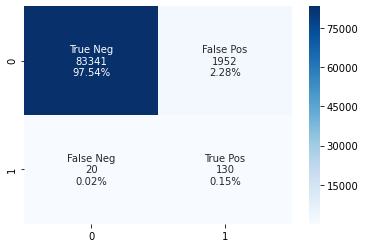

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf2 = confusion_matrix(y_test, NB_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf2.flatten()/np.sum(conf2)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf2, annot=labels, fmt='', cmap='Blues')

### Metrics for Gaussian Naive Bayes

In [40]:
print('Precision: {:.2f}'.format(130/(130+1952)*100),('%'))
print('Recall: {:.2f}'.format(130/(130+20)*100),('%'))
print('Accuracy: {:.2f}'.format((130+83341)/(130+83341+1952+20)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((130/(130+1952))*(130/(130+20))/(130/(130+1952)+130/(130+20)))*100),('%'))

Precision: 6.24 %
Recall: 86.67 %
Accuracy: 97.69 %
F1- Score: 11.65 %


## Linear Discriminant Analysis

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis()
LDA_model = LDA.fit(X_balanced, y_balanced)
LDA_model.score(X_balanced, y_balanced)

0.9176447829888154

In [42]:
LDA_model.score(X_test,y_test)

0.9870791053684913

<AxesSubplot:>

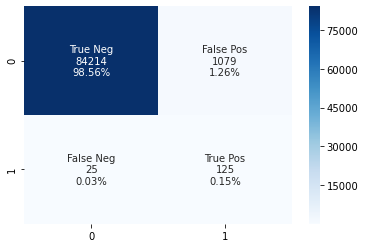

In [43]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf3 = confusion_matrix(y_test, LDA_model.predict(X_test))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf3.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf3.flatten()/np.sum(conf3)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf3, annot=labels, fmt='', cmap='Blues')


### Metrics for Linear Discriminant Analysis

In [45]:
print('Precision: {:.2f}'.format(125/(125+1079)*100),('%'))
print('Recall: {:.2f}'.format(125/(125+25)*100),('%'))
print('Accuracy: {:.2f}'.format((125+84214)/(125+84214+1079+25)*100),('%'))
print('F1- Score: {:.2f}'.format(2*((125/(125+1079))*(125/(125+25))/(125/(125+1079)+125/(125+25)))*100),('%'))

Precision: 10.38 %
Recall: 83.33 %
Accuracy: 98.71 %
F1- Score: 18.46 %


## Summary of scores

<img src="Capture.PNG" style="width:500px;height:350px"/>